In [1]:
library(tidyverse)
library(visdat)
library(readr)
library(skimr)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
irrigation_df <- "irrigated-land-area-raw-2020-update.csv" %>% 
read_csv()

Rows: 39859 Columns: 9
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (6): WKT, type, notes, status, confidence, Region
dbl (3): area_ha, year_irr, yearmapped

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
irrigation_df  %>% 
    problems() %>% 
    head()

row,col,expected,actual,file
<int>,<int>,<chr>,<chr>,<chr>


Warning message:
"`gather_()` was deprecated in tidyr 1.2.0.
Please use `gather()` instead."


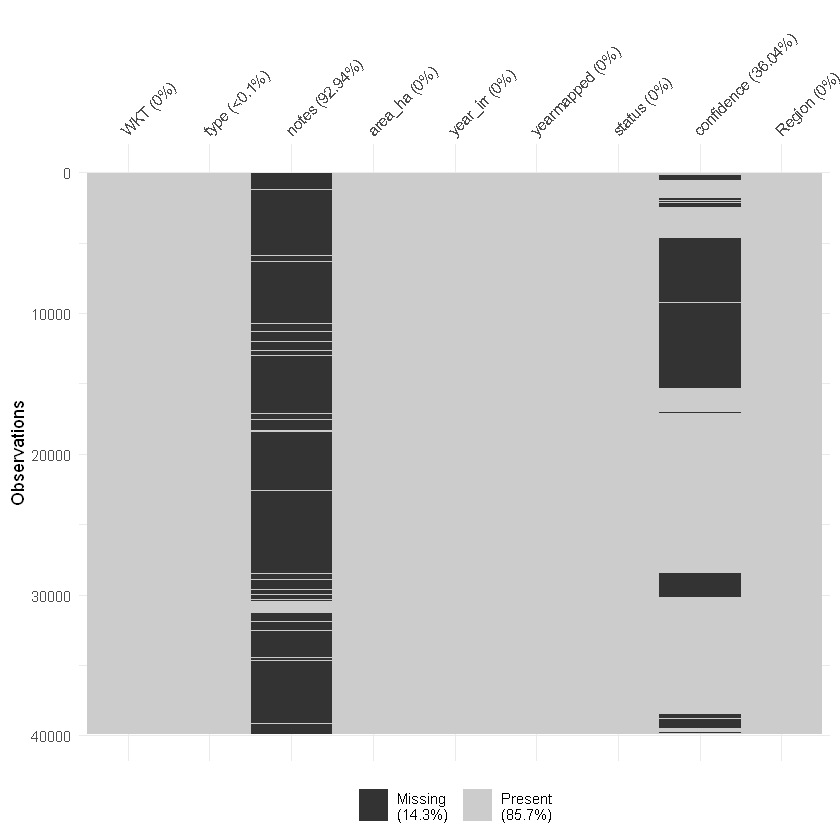

In [4]:
irrigation_df %>% 
vis_miss()

In [5]:
irrigation_df <- irrigation_df %>%
select(-notes) %>% 
select(-confidence)

In [6]:
fertiliser_application <- "fertilisers-nitrogen-and-phosphorus-applied-2002-2019.csv" %>% 
read_csv()

Rows: 4361 Columns: 10
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (5): region, dominant_farm_type, line_code, name, unit
dbl (4): year, fertiliser, nitrogen, phosphorus
lgl (1): suppressed

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


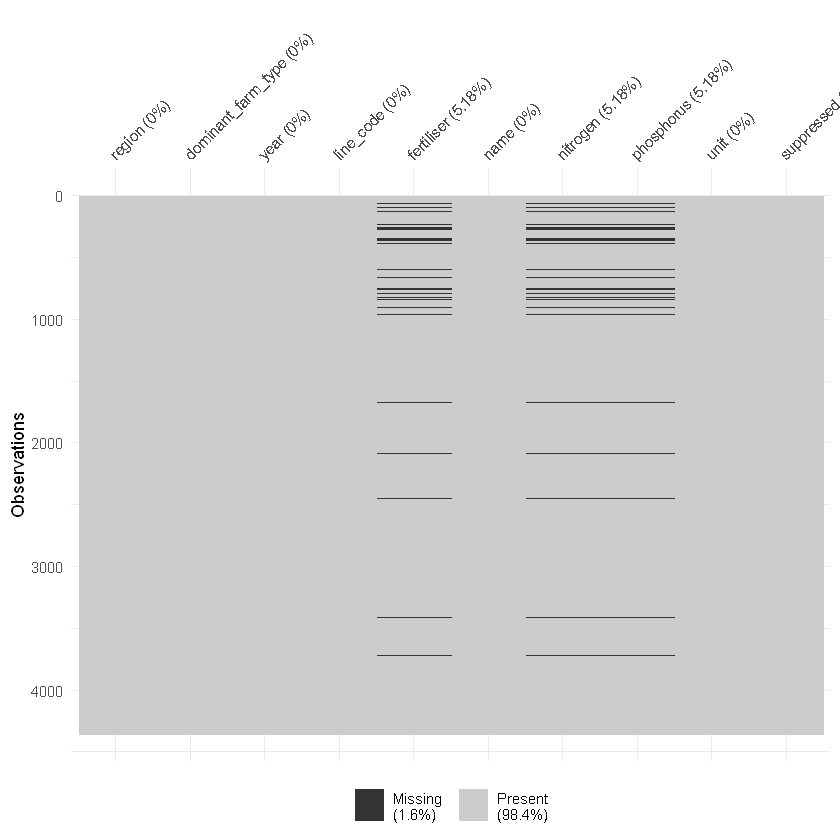

In [7]:
fertiliser_application %>% vis_miss()

In [8]:
fertiliser_application %>%
filter(suppressed == FALSE) %>% 
filter(year >= 2014) %>% 
filter(year <= 2018) %>% 
select(-suppressed, -line_code) %>% 
filter(region == "Chatham Islands")

region,dominant_farm_type,year,fertiliser,name,nitrogen,phosphorus,unit
<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
Chatham Islands,Forestry,2017,0.0,Urea,0.0000,0.000,Tonnes
Chatham Islands,Forestry,2017,0.0,Diammonium phosphate,0.0000,0.000,Tonnes
Chatham Islands,Forestry,2017,0.0,Urea coated,0.0000,0.000,Tonnes
Chatham Islands,Forestry,2017,0.0,Urea non-coated,0.0000,0.000,Tonnes
Chatham Islands,Forestry,2017,0.0,Ammonium sulphate,0.0000,0.000,Tonnes
Chatham Islands,Forestry,2017,0.0,Superphosphate,0.0000,0.000,Tonnes
Chatham Islands,Other,2017,0.0,Urea,0.0000,0.000,Tonnes
Chatham Islands,Other,2017,0.0,Diammonium phosphate,0.0000,0.000,Tonnes
Chatham Islands,Other,2017,0.0,Urea coated,0.0000,0.000,Tonnes


In [9]:
fertiliser_app_df <- fertiliser_application %>%
filter(suppressed == FALSE) %>% 
select(-suppressed, -line_code)

In [10]:
fertiliser_app_df <- fertiliser_app_df %>% 
group_by(region, year) %>%
summarise(sum_nitrogen = sum(nitrogen))

`summarise()` has grouped output by 'region'. You can override using the `.groups` argument.


In [11]:
fertiliser_app_df <- fertiliser_app_df %>% 
group_by(region) %>% 
summarise(mean_nitrogen_per_year = mean(sum_nitrogen))

In [12]:
farm_size <- "farm-numbers-and-size-2002-2019.csv" %>% 
read_csv()

Rows: 211 Columns: 5
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (3): region, variable, unit
dbl (2): value, year

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [23]:
farm_area <- farm_size %>%
filter(unit == 'Hectares') %>% 
select(-variable) %>% 
select(-unit)

In [24]:
farm_area$region <- gsub(" Region", "", as.character(farm_area$region))

In [26]:
farm_area %>% arrange(desc(year)) 

region,value,year
<chr>,<dbl>,<dbl>
Northland,706668.4,2019
Auckland,268632.0,2019
Waikato,1528315.7,2019
Bay of Plenty,581936.8,2019
Gisborne,533264.6,2019
Hawke's Bay,907310.9,2019
Taranaki,452313.0,2019
Manawatu-Whanganui,1363691.6,2019
Wellington,454627.8,2019


In [131]:
nitrogen_farm_area <- full_join(farm_area, fertiliser_app_df, by = "region")

nitrogen_farm_area <- nitrogen_farm_area %>%
mutate(t_per_ha = mean_nitrogen_per_year / mean_area)

In [132]:
groundwater_state <- "groundwater-quality-state-2014-18.csv" %>% 
read_csv()


Rows: 14644 Columns: 17
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): site, region, period, measure, percentile, units, n_n_guideline
dbl (10): period_start, period_end, data_value, measurements_per_site, years...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [133]:
groundwater_df <- groundwater_state %>% 
filter(measure == "Nitrate nitrogen") %>% 
select(region:n_n_guideline)


In [134]:
groundwater_df <- groundwater_df %>% 
select(region, dwsnz_exceed_percent) %>% 
na.omit()

In [135]:
groundwater_df <- groundwater_df %>% 
group_by(region) %>% 
summarise(mean_exceed = mean(dwsnz_exceed_percent))

In [136]:
farms_and_gw_n <- full_join(groundwater_df, nitrogen_farm_area, by = "region")

In [139]:
farms_and_gw_n %>% arrange(desc(mean_exceed)) 

region,mean_exceed,mean_area,mean_nitrogen_per_year,t_per_ha
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Auckland,44.8888889,268673.57,8157.80160,0.0303632460
Waikato,19.8833333,1605414.02,154093.30903,0.0959835329
Manawatu-Whanganui,19.0653846,1432059.50,51253.90161,0.0357903436
Southland,14.6433333,1164689.22,83432.78954,0.0716352383
Canterbury,10.0039604,2824509.58,202434.63223,0.0716707188
Taranaki,9.6238095,457458.78,52862.21068,0.1155562263
Tasman,8.0947368,237737.30,7311.14933,0.0307530595
Otago,5.3000000,2236236.90,41759.69274,0.0186740916
Wellington,1.4736842,471751.97,15529.86674,0.0329195591
